# Understanding Feature Extraction and Convolution in Computer Vision


## Introduction

In this notebook, we will explore the concept of feature extraction using the convolution operation in PyTorch, a popular deep learning framework. Feature extraction is a critical step in computer vision tasks, where we aim to extract meaningful patterns or features from images that can be used for various tasks like object detection, image recognition, and more.

### Table of Contents
1. Introduction to Convolution and Feature Extraction

2. Convolution in PyTorch

    2.1 Importing Necessary Packages
    
    2.2 Creating the Input Matrix
    
    2.3 Defining the Custom Convolutional Kernel
    
    2.4 Performing Element-wise Multiplication
    
    2.5 Calculating the Convolution Output
    
    2.6 Example: Convolving a Sunflower Image
    
3. Creating a Filter for Edge Detection

    3.1 Importing Resources and Displaying the Image
    
    3.2 Converting the Image to Grayscale
    
    3.3 Creating and Applying a Sobel X Operator
    
    3.4 Testing Other Filters

Exercise: Custom Kernel for Feature Extraction

## 1. Introduction to Convolution and Feature Extraction
Convolution is a fundamental operation in deep learning, especially in convolutional neural networks (CNNs), used extensively in computer vision tasks. It involves sliding a small filter (also called a kernel) over an input matrix, performing element-wise multiplication and summation to produce a new output matrix called the feature map. The feature map represents the response of the filter to different patterns in the input matrix.

Feature extraction using convolution helps identify important patterns, edges, and textures in an image. These extracted features are then used as inputs for higher-level tasks, such as image classification or object detection.

## 2. Convolution in PyTorch
### 2.1 Importing Necessary Packages
Let's start by importing the required libraries and packages for the first part of the notebook.

In [2]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt


## 2.2 Creating the Input Matrix
We will create a 3x3 input matrix (A) that we want to convolve with a custom kernel later on.

In [3]:
A = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=torch.float32)
print(A)


tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


### 2.3 Defining the Custom Convolutional Kernel
Now, let's define the convolutional kernel (B) that will be used to convolve with the input matrix (A). The values of this kernel will be manually set for edge detection.

In [4]:
B = torch.tensor([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], dtype=torch.float32)
print(B)


tensor([[-1., -1., -1.],
        [-1.,  8., -1.],
        [-1., -1., -1.]])


### 2.4 Performing Element-wise Multiplication
The first step of the convolution operation is to perform element-wise multiplication between the input matrix (A) and the convolutional kernel (B).

In [5]:
mult_out = torch.mul(A, B)
print(mult_out)


tensor([[-1., -2., -3.],
        [-4., 40., -6.],
        [-7., -8., -9.]])


### 2.5 Calculating the Convolution Output
The second step is to sum the elements of the result obtained from the element-wise multiplication. The resulting single value represents the convolved output.

In [7]:
conv_out = torch.sum(mult_out)
print(conv_out)


tensor(0.)


### 2.6 Example: Convolving a Sunflower Image
In this section, we will convolve a real sunflower image using the same 3x3 kernel (B) for edge detection.

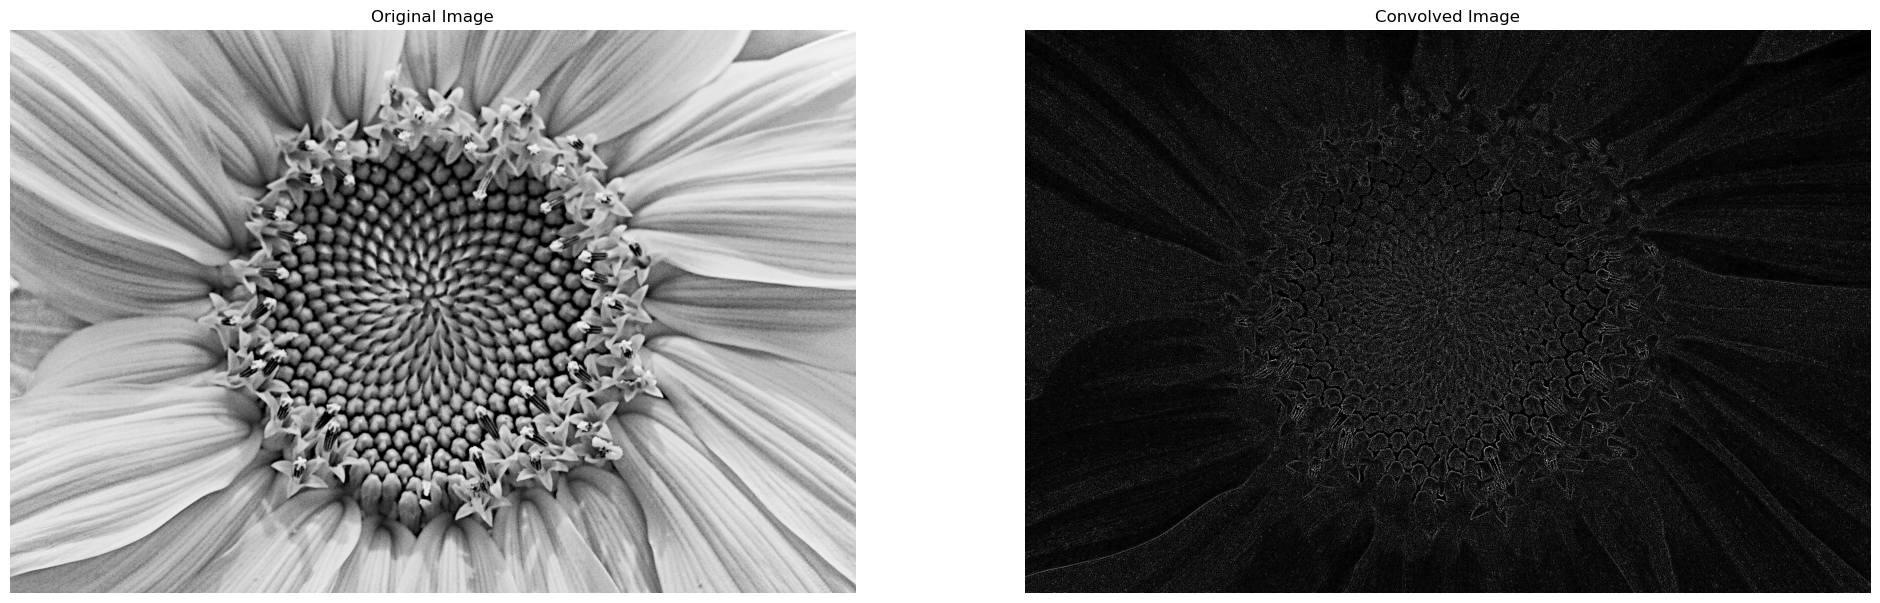

In [8]:
# Load and display the sunflower image
image = cv2.imread('02.1_sunflower_image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply the convolution...
img = cv2.filter2D(image, -1, B.numpy())

# Display the original and convolved images side by side
fig, ax = plt.subplots(1, 2, figsize=(24, 16))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(img)
ax[1].set_title('Convolved Image')
ax[1].axis('off')

plt.show()


## 3. Creating a Filter for Edge Detection
In this section, we will explore edge detection using a Sobel filter. The Sobel filter is commonly used in edge detection and helps identify edges and gradients in an image.
3.1 Importing Resources and Displaying the Image

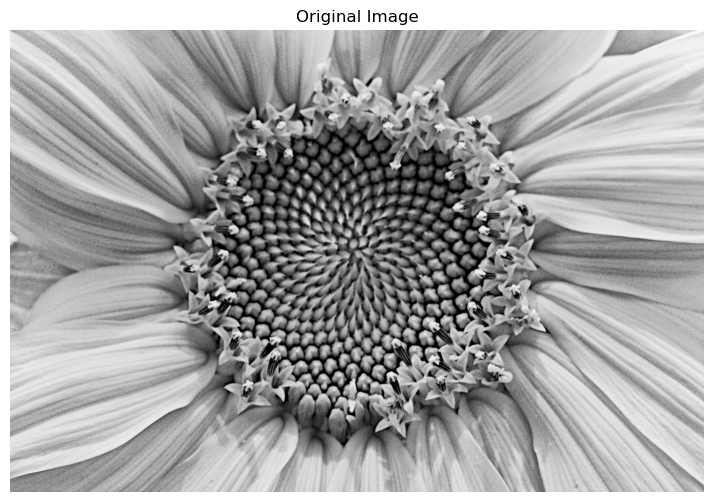

In [16]:
# Load the image
image_path = '02.1_sunflower_image.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original and grayscale images
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.show()



3.3 Creating and Applying a Sobel X Operator
Now, we'll create a custom Sobel X operator and apply it to the grayscale image to detect edges in the x-direction.

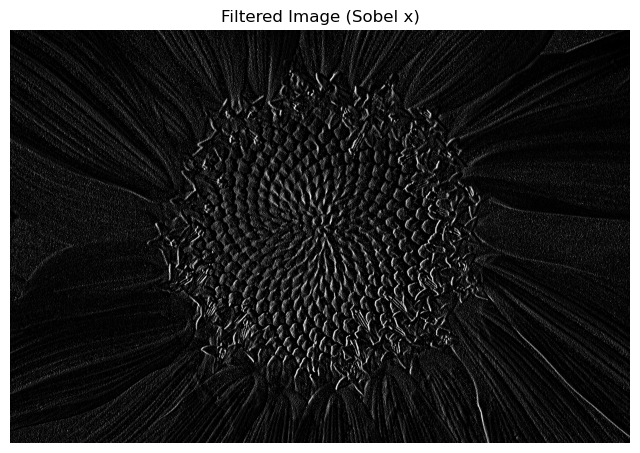

In [17]:
# Define the Sobel x operator
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# Convert the Sobel x operator to a PyTorch tensor
sobel_x = torch.tensor(sobel_x, dtype=torch.float32)

# Apply the convolution using filter2D
filtered_image = cv2.filter2D(gray, -1, sobel_x.numpy())

# Display the filtered image
plt.figure(figsize=(8, 6))
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Sobel x)')
plt.axis('off')

plt.show()



### 3.4 Testing Other Filters
Feel free to create and test other filters to see different effects on the image. For example, you can create filters with decimal value weights or try a 5x5 filter.

## 4. Exercise: Custom Kernel for Feature Extraction
For this exercise, you'll define your custom kernel to perform feature extraction. Experiment with different kernel values to see how they affect the feature map. Ensure that the sum of the kernel values is between 0 and 1 for best results.

In [18]:
# Define your custom kernel with 3 rows and 3 columns
kernel = torch.tensor([[0.1, 0.2, 0.1], [0.2, 0.4, 0.2], [0.1, 0.2, 0.1]], dtype=torch.float32)

# Display the kernel
print(kernel)


tensor([[0.1000, 0.2000, 0.1000],
        [0.2000, 0.4000, 0.2000],
        [0.1000, 0.2000, 0.1000]])


Now, let's define our custom filters for edge detection.

In [20]:
# Custom edge detection filter with decimal value weights
custom_filter_decimal = np.array([[-0.5, 0.5, 1], [-1, 2.5, -1], [-1, -0.5, 0.5]])

# Custom 5x5 edge detection filter
custom_filter_5x5 = np.array([[-1, -1, -1, -1, -1],
                              [-1, -1, -1, -1, -1],
                              [-1, -1, 24, -1, -1],
                              [-1, -1, -1, -1, -1],
                              [-1, -1, -1, -1, -1]])


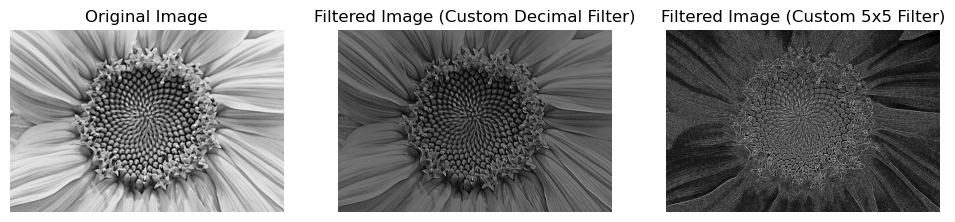

In [21]:
# Load the image
image_path = '02.1_sunflower_image.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the custom filters as PyTorch tensors
custom_filter_decimal = torch.tensor(custom_filter_decimal, dtype=torch.float32)
custom_filter_5x5 = torch.tensor(custom_filter_5x5, dtype=torch.float32)

# Apply the custom filters using filter2D
filtered_image_decimal = cv2.filter2D(gray, -1, custom_filter_decimal.numpy())
filtered_image_5x5 = cv2.filter2D(gray, -1, custom_filter_5x5.numpy())

# Display the original and filtered images
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filtered_image_decimal, cmap='gray')
plt.title('Filtered Image (Custom Decimal Filter)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image_5x5, cmap='gray')
plt.title('Filtered Image (Custom 5x5 Filter)')
plt.axis('off')

plt.show()


Conclusion
In this notebook, we explored the concepts of feature extraction and convolution in computer vision. We learned how to perform convolution using PyTorch and applied custom kernels for feature extraction. Understanding feature extraction is crucial for building effective computer vision models and can be a stepping stone for more complex tasks like object detection and segmentation. Experimenting with different kernels allows us to extract specific patterns and information from images, enabling us to gain insights and make better decisions in various applications.